In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

import numpy as np


# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [25]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [26]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
#(x_train, _), (x_test, _) = mnist.load_data()

fashion_mnist = keras.datasets.fashion_mnist

(x_train, train_labels), (x_test, test_labels) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [28]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2771 - val_loss: 0.1925
Epoch 2/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1729 - val_loss: 0.1549
Epoch 3/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1455 - val_loss: 0.1350
Epoch 4/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1298 - val_loss: 0.1228
Epoch 5/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1197 - val_loss: 0.1142
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1125 - val_loss: 0.1083
Epoch 7/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1073 - val_loss: 0.1038
Epoch 8/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1035 - val_loss: 0.1007
Epoch 9/50
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1008 - val_

In [29]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

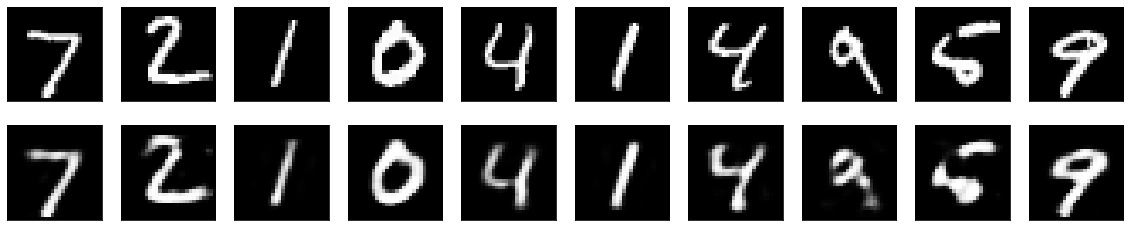

In [30]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## With regularization

In [31]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [32]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2840 - val_loss: 0.2004
Epoch 2/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1801 - val_loss: 0.1621
Epoch 3/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1532 - val_loss: 0.1435
Epoch 4/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1389 - val_loss: 0.1322
Epoch 5/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1293 - val_loss: 0.1242
Epoch 6/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1224 - val_loss: 0.1183
Epoch 7/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1173 - val_loss: 0.1139
Epoch 8/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1135 - val_loss: 0.1107
Epoch 9/50
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1108 - val_

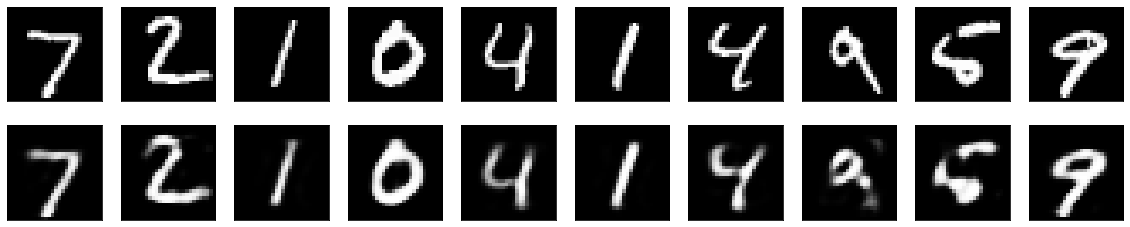

In [33]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deeper Architecture

In [44]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded_1 = layers.Dense(64, activation='relu')(encoded)
decoded_2 = layers.Dense(128, activation='relu')(decoded_1)
decoded_3 = layers.Dense(784, activation='sigmoid')(decoded_2)

autoencoder = keras.Model(input_img, decoded_3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Create the decoder model
decoder = keras.Model(encoded_input, autoencoder.layers[-1](autoencoder.layers[-2](autoencoder.layers[-3](encoded_input))))

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2495 - val_loss: 0.1678
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1522 - val_loss: 0.1364
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1320 - val_loss: 0.1247
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1224 - val_loss: 0.1175
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1167 - val_loss: 0.1132
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1129 - val_loss: 0.1098
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1095 - val_loss: 0.1074
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1062 - val_loss: 0.1035
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.10

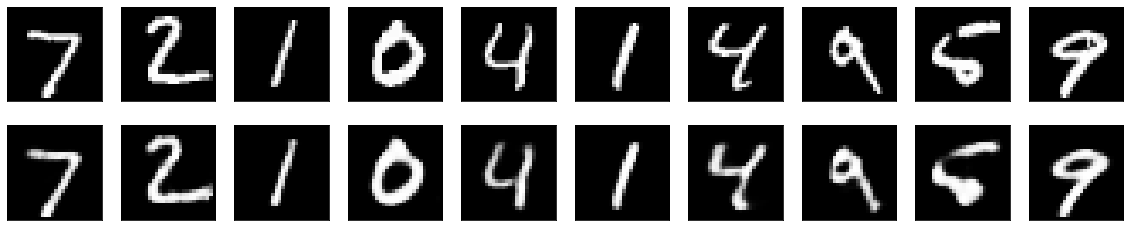

In [45]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

In [46]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [47]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [48]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2155 - val_loss: 0.1472
Epoch 2/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1356 - val_loss: 0.1252
Epoch 3/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1217 - val_loss: 0.1168
Epoch 4/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1154 - val_loss: 0.1119
Epoch 5/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1115 - val_loss: 0.1088
Epoch 6/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1087 - val_loss: 0.1071
Epoch 7/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1065 - val_loss: 0.1047
Epoch 8/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1048 - val_loss: 0.1029
Epoch 9/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1034 - val_

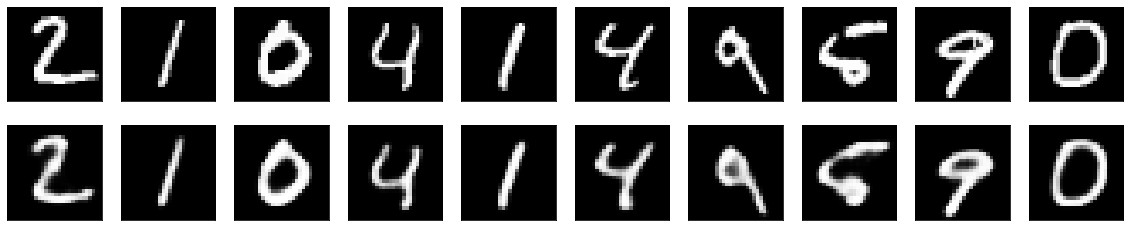

In [49]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Denoising

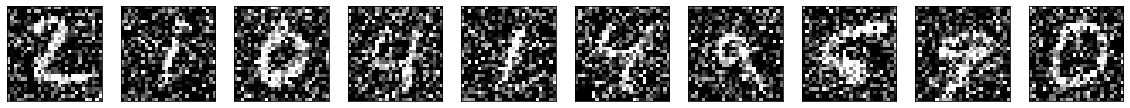

In [51]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [53]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1630 - val_loss: 0.1149
Epoch 2/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1118 - val_loss: 0.1072
Epoch 3/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1066 - val_loss: 0.1045
Epoch 4/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1041 - val_loss: 0.1022
Epoch 5/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1025 - val_loss: 0.1009
Epoch 6/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1013 - val_loss: 0.0997
Epoch 7/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1003 - val_loss: 0.0991
Epoch 8/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0995 - val_loss: 0.0985
Epoch 9/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.09

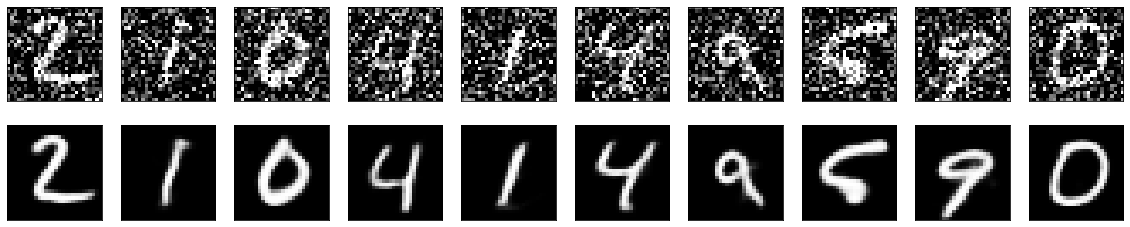

In [55]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
#import os
#temp=os.getpid()
## !kill -9 $temp